# API-SPOTIFY

In [7]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

In [8]:
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

In [9]:
auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [10]:
artist_ID = "0s5dS3eWWnruwMMtgn7pgQ"

In [11]:
result = sp.artist_top_tracks(artist_ID, country="ES")
if result: 
    tracks = result["tracks"]
    tracks = [
        {
            "name": track["name"],
            "popularity": track["popularity"],
            "duration_ms": (track["duration_ms"] / (1000 * 60)) 
        }
        for track in tracks
    ]

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(5))

                              name  popularity  duration_ms
6             Fandangos Abandolaos          18     3.118300
8           Un Ala Rota - Garrotín          18     4.137500
9                    Agua - Tangos          19     3.653333
7      Aunque se apaguen las luces          19     3.425000
4  Alumbra El Firmamento - Guajira          26     4.353200


In [12]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)



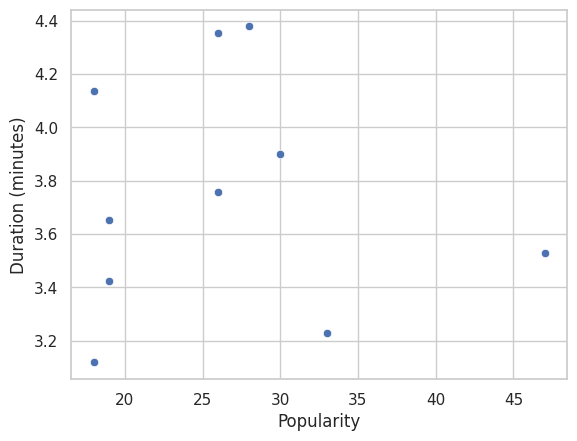

In [13]:
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")

plt.xlabel("Popularity")
plt.ylabel("Duration (minutes)")
plt.savefig("Rocio_Marquez_top_tracks.png")

plt.show()